In [1]:
# Import all the neccessary libs for data exploration proccess (EDA)
import pandas as pd  # pandas for data manipulation
import numpy as np # numpy for numeric manipulation and computing
import matplotlib.pyplot as plt # matplotlib for visualisation
import seaborn as sns # seaborn as style for the matplotlib
%matplotlib inline 
import warnings # import warnings for warnings disable 
warnings.filterwarnings("ignore") # ignore the warnigns

In [2]:
df = pd.read_csv('Auto.csv')
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [3]:
# <dataFrame>.info() method is used to gain an overall information from the dataFrame.
# the main info from this method is 1) Number of columns in the dataset 2) number of feature in each column(s)
# 3) the dtype of the feature in the DataFrame

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 9 columns):
mpg             397 non-null float64
cylinders       397 non-null int64
displacement    397 non-null float64
horsepower      397 non-null object
weight          397 non-null int64
acceleration    397 non-null float64
year            397 non-null int64
origin          397 non-null int64
name            397 non-null object
dtypes: float64(3), int64(4), object(2)
memory usage: 28.0+ KB


In [4]:
# <DataFrame>.dtypes -> check the data type of each feature in the sample

print(df.dtypes)

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight            int64
acceleration    float64
year              int64
origin            int64
name             object
dtype: object


In [5]:
# <DataFrame>.describe() -> the method of pandas to gain the basic statistics from the dataframe.

df.describe()

,mpg,cylinders,displacement,weight,acceleration,year,origin
count,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000
mean,23.515869,5.458438,193.532746,2970.261965,15.555668,75.994962,1.574307
std,7.825804,1.701577,104.379583,847.904119,2.749995,3.690005,0.802549
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.000000,2223.000000,13.800000,73.000000,1.000000
50%,23.000000,4.000000,146.000000,2800.000000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3609.000000,17.100000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


In [6]:
# Pandas has a special method <df>.corr() that allows us to compute the correlation between features in our data.

Corr = df.corr()

In [7]:
Corr

,mpg,cylinders,displacement,weight,acceleration,year,origin
mpg,1.000000,-0.776260,-0.804443,-0.831739,0.422297,0.581469,0.563698
cylinders,-0.776260,1.000000,0.950920,0.897017,-0.504061,-0.346717,-0.564972
displacement,-0.804443,0.950920,1.000000,0.933104,-0.544162,-0.369804,-0.610664
weight,-0.831739,0.897017,0.933104,1.000000,-0.419502,-0.307900,-0.581265
acceleration,0.422297,-0.504061,-0.544162,-0.419502,1.000000,0.282901,0.210084
year,0.581469,-0.346717,-0.369804,-0.307900,0.282901,1.000000,0.184314
origin,0.563698,-0.564972,-0.610664,-0.581265,0.210084,0.184314,1.000000


In [8]:
type(Corr)

pandas.core.frame.DataFrame

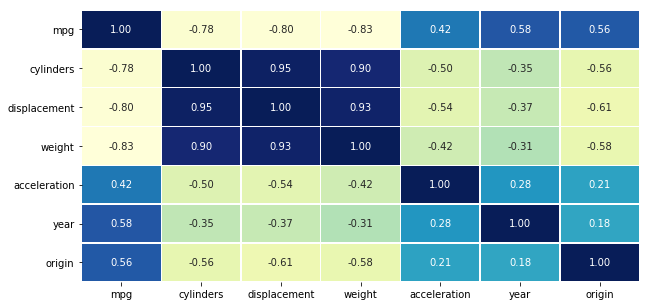

In [10]:
# sns.hearmap(<data>, <annot(True / False), <fmt>) -> allows to create a heatmap visualisation of the corr matrix beetween variables
# more about it --> https://seaborn.pydata.org/generated/seaborn.heatmap.html

# Change the figure size (plot size)
plt.figure(figsize = (10, 5))

# Draw the correlation heatmap to see the visual results
sns.heatmap(data = Corr, annot = True, fmt = '.2f', linewidths = .5, cmap = "YlGnBu", cbar = False)

In [14]:
# If you want to manually print out the corr statistic between variables just iterate over created Corr matrix
CorField = []     # Create empty array
for i in Corr:
    for j in Corr.index[Corr[i] > 0.55]:
        if i != j and j not in CorField and i not in CorField:
            CorField.append(j)
            print (i,j, Corr[i][Corr.index == j].values[0])

mpg year 0.5814694591513871
mpg origin 0.5636979050311015
cylinders displacement 0.9509198650928308
cylinders weight 0.8970168684033447


In [16]:
# You can also check for the correlation individual features in the dataset using <df[[cols]]>.corr()
Corr = df[['mpg', 'cylinders', 'displacement', 'acceleration']].corr()  
Corr

,mpg,cylinders,displacement,acceleration
mpg,1.000000,-0.776260,-0.804443,0.422297
cylinders,-0.776260,1.000000,0.950920,-0.504061
displacement,-0.804443,0.950920,1.000000,-0.544162
acceleration,0.422297,-0.504061,-0.544162,1.000000


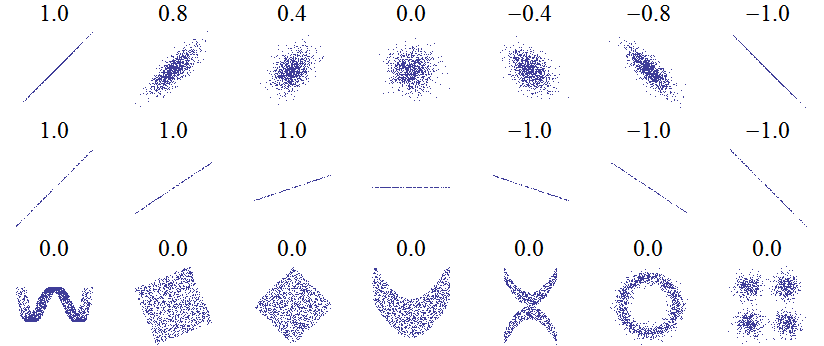

(50, 390)

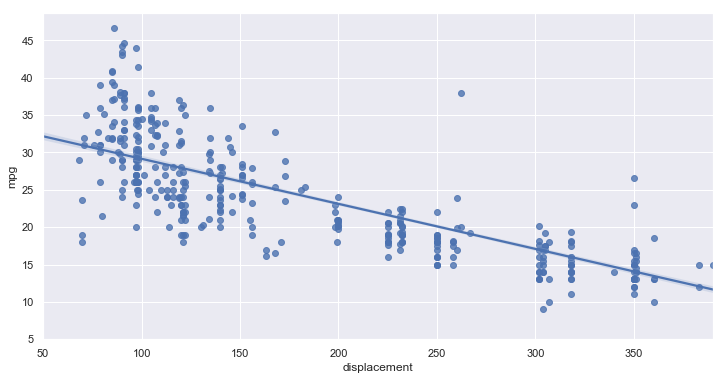

In [31]:
# Visually represent the correlation between 2 features with regression plot 
# more about --> https://seaborn.pydata.org/generated/seaborn.regplot.html

# Set the size of the regression plot using matplotlib
plt.figure(figsize = (12, 6))
sns.set(color_codes = True)
# Create pair regression plot using sns.regplot method
sns.regplot(x = "displacement", y = "mpg", data = df, x_ci = [0, 75], ci = 75)
plt.ylim(5,)
plt.xlim(50,390)

In [32]:
df[["displacement", "mpg"]].corr()

,displacement,mpg
displacement,1.000000,-0.804443
mpg,-0.804443,1.000000


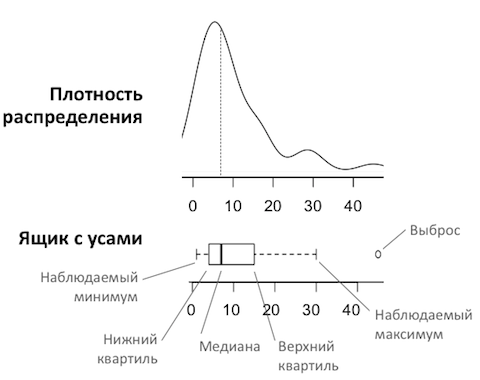

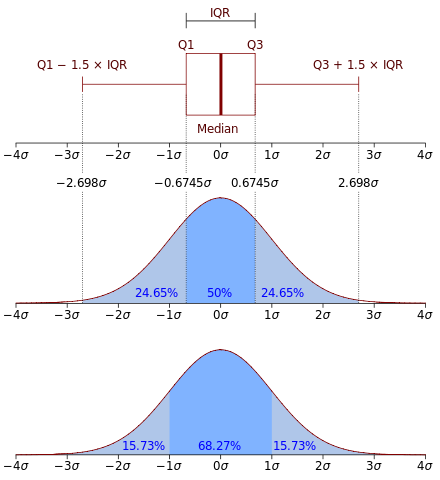

In [33]:
df.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'year', 'origin', 'name'],
      dtype='object')

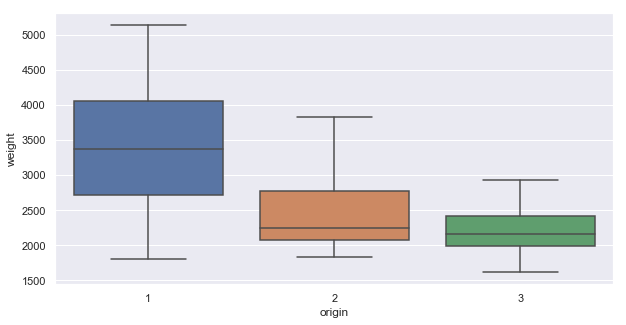

In [36]:
# set the size params of the figure
plt.figure(figsize = (10, 5))
# Lets create such a boxplot and visualise the density plots as described upwards
sns.boxplot(x = "origin", y = "weight", data = df)

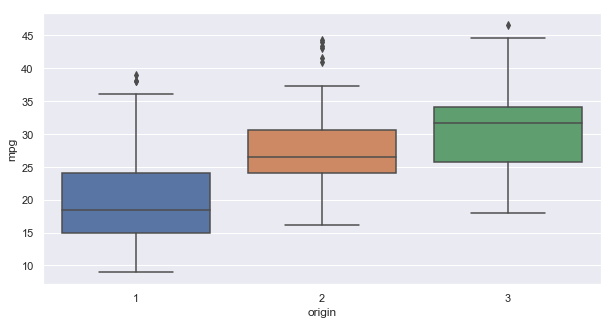

In [38]:
plt.figure(figsize = (10, 5))
sns.boxplot(x = "origin", y = "mpg", data=df)

In [39]:
# also we can describe the categorical features that are present in the dataset by applying include = ['object']
df.describe(include = ['object'])

,horsepower,name
count,397,397
unique,94,304
top,150,ford pinto
freq,22,6


In [40]:
# value_counts() -> counts the number of unique values for feature
df['origin'].value_counts()

1    248
3     79
2     70
Name: origin, dtype: int64

In [42]:
# change to the dataframe object
df['origin'].value_counts().to_frame()

,origin
1,248
3,79
2,70


In [43]:
drive_wheels_counts = df['origin'].value_counts().to_frame()
drive_wheels_counts.rename(columns = {'origin': 'group_size'}, inplace = True)
drive_wheels_counts

,group_size
1,248
3,79
2,70


In [44]:
drive_wheels_counts.index.name = 'origin'
drive_wheels_counts

,group_size
origin,
1,248
3,79
2,70


In [45]:
df['year'].unique()

array([70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82], dtype=int64)

In [46]:
# here I've added an aditional information to show how you can group the data
df_group_one = df[['drive-wheels','body-style','price']]

In [47]:
# group by drive wheels 
df_group_one = df_group_one.groupby(['drive-wheels'], as_index = False).mean()
df_group_one

,drive-wheels,price
0,4wd,10241.000000
1,fwd,9244.779661
2,rwd,19757.613333


In [48]:
# moreover you can group by 2 parameters/features
df_gptest = df[['drive-wheels','body-style','price']]
grouped_test1 = df_gptest.groupby(['drive-wheels','body-style'],as_index = False).mean()
grouped_test1

,drive-wheels,body-style,price
0,4wd,hatchback,7603.000000
1,4wd,sedan,12647.333333
2,4wd,wagon,9095.750000
3,fwd,convertible,11595.000000
4,fwd,hardtop,8249.000000
5,fwd,hatchback,8396.387755
6,fwd,sedan,9811.800000
7,fwd,wagon,9997.333333
8,rwd,convertible,23949.600000
9,rwd,hardtop,24202.714286


In [49]:
grouped_pivot = grouped_test1.pivot(index = 'drive-wheels', columns = 'body-style')
grouped_pivot

price                                            \
body-style   convertible       hardtop     hatchback         sedan   
drive-wheels                                                         
4wd                  NaN           NaN   7603.000000  12647.333333   
fwd              11595.0   8249.000000   8396.387755   9811.800000   
rwd              23949.6  24202.714286  14337.777778  21711.833333   

                            
body-style           wagon  
drive-wheels                
4wd            9095.750000  
fwd            9997.333333  
rwd           16994.222222

In [50]:
grouped_pivot = grouped_pivot.fillna(0) 
grouped_pivot

price                                            \
body-style   convertible       hardtop     hatchback         sedan   
drive-wheels                                                         
4wd                  0.0      0.000000   7603.000000  12647.333333   
fwd              11595.0   8249.000000   8396.387755   9811.800000   
rwd              23949.6  24202.714286  14337.777778  21711.833333   

                            
body-style           wagon  
drive-wheels                
4wd            9095.750000  
fwd            9997.333333  
rwd           16994.222222

In [51]:
df_gptest2 = df[['body-style','price']]
grouped_test_bodystyle = df_gptest2.groupby(['body-style'], as_index= False).mean()
grouped_test_bodystyle

,body-style,price
0,convertible,21890.500000
1,hardtop,22208.500000
2,hatchback,9957.441176
3,sedan,14459.755319
4,wagon,12371.960000


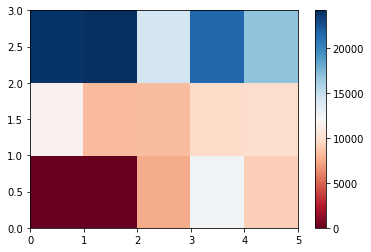

In [52]:
plt.pcolor(grouped_pivot, cmap='RdBu')
plt.colorbar()
plt.show()

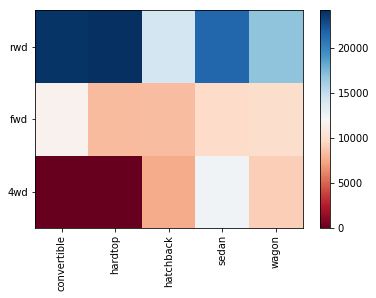

In [53]:
fig, ax = plt.subplots()
im = ax.pcolor(grouped_pivot, cmap='RdBu')

row_labels = grouped_pivot.columns.levels[1]
col_labels = grouped_pivot.index

ax.set_xticks(np.arange(grouped_pivot.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(grouped_pivot.shape[0]) + 0.5, minor=False)

ax.set_xticklabels(row_labels, minor=False)
ax.set_yticklabels(col_labels, minor=False)

plt.xticks(rotation=90)

fig.colorbar(im)
plt.show()

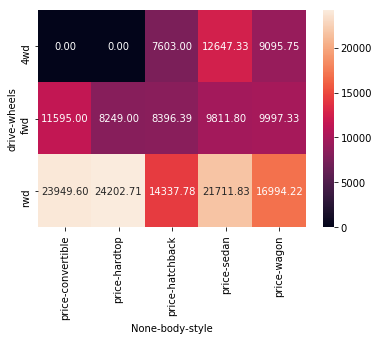

In [54]:
sns.heatmap(grouped_pivot, annot=True, fmt='.2f')

In [56]:
from scipy import stats

In [106]:
cols = ['wheel-base', 'horsepower', 'length', 'width', 'curb-weight',
       'engine-size', 'bore', 'city-mpg', 'highway-mpg']

for col in cols: 
    pearson_coef, p_value = stats.pearsonr(df[col], df['price'])
    print("PearsonR между {} и price {} с P-знчением P = {}".format(
          col, pearson_coef, p_value ))
    
    if p_value < 0.001:
        print('Корреляция между {} и price статистически значимая'.format(col))
    elif p_value < 0.05:
        print('Корреляция между {} и price средняя'.format(col))
    elif p_value < 0.1:
        print('Корреляция между {} и price слабая'.format(col))
    else:
        print('Корреляция между {} и price статистически незначимая'.format(col))
        
    if pearson_coef > 0 :
        if pearson_coef > 0.85:
            print('Коэффициент ~{} показывает положительную очень сильную связь\n'.format(pearson_coef))
        elif pearson_coef > 0.75 :
            print('Коэффициент ~{} показывает положительную достаточно сильную связь\n'.format(pearson_coef))
        elif pearson_coef > 0.60:
            print('Коэффициент ~{} показывает положительную относительно сильную связь\n'.format(pearson_coef))
        elif pearson_coef > 0.50 :
            print('Коэффициент ~{} показывает положительную среднюю связь\n'.format(pearson_coef))
        else:
            print('Коэффициент ~{} показывает положительную слабую связь\n'.format(pearson_coef))
    else:
        if abs(pearson_coef) > 0.85:
            print('Коэффициент ~{} показывает негативную очень сильную связь\n'.format(pearson_coef))
        elif abs(pearson_coef) > 0.75 :
            print('Коэффициент ~{} показывает негативную достаточно сильную связь\n'.format(pearson_coef))
        elif abs(pearson_coef) > 0.60:
            print('Коэффициент ~{} показывает негативную относительно сильную связь\n'.format(pearson_coef))
        elif abs(pearson_coef) > 0.50 :
            print('Коэффициент ~{} показывает положительную среднюю связь\n'.format(pearson_coef))
        else:
            print('Коэффициент ~{} показывает положительную слабую связь\n'.format(pearson_coef))

PearsonR между wheel-base и price 0.5846418222655081 с P-знчением P = 8.076488270732955e-20
Корреляция между wheel-base и price статистически значимая
Коэффициент ~0.5846418222655081 показывает положительную среднюю связь

PearsonR между horsepower и price 0.8095745670036559 с P-знчением P = 6.36905742825998e-48
Корреляция между horsepower и price статистически значимая
Коэффициент ~0.8095745670036559 показывает положительную достаточно сильную связь

PearsonR между length и price 0.690628380448364 с P-знчением P = 8.016477466159053e-30
Корреляция между length и price статистически значимая
Коэффициент ~0.690628380448364 показывает положительную относительно сильную связь

PearsonR между width и price 0.7512653440522674 с P-знчением P = 9.200335510481426e-38
Корреляция между width и price статистически значимая
Коэффициент ~0.7512653440522674 показывает положительную достаточно сильную связь

PearsonR между curb-weight и price 0.8344145257702846 с P-знчением P = 2.1895772388936997e-53


In [58]:
grouped_test2=df_gptest[['drive-wheels', 'price']].groupby(['drive-wheels'])
grouped_test2.head(2)

,drive-wheels,price
0,rwd,13495.0
1,rwd,16500.0
3,fwd,13950.0
4,4wd,17450.0
5,fwd,15250.0
136,4wd,7603.0


In [59]:
df_gptest

,drive-wheels,body-style,price
0,rwd,convertible,13495.0
1,rwd,convertible,16500.0
2,rwd,hatchback,16500.0
3,fwd,sedan,13950.0
4,4wd,sedan,17450.0
5,fwd,sedan,15250.0
6,fwd,sedan,17710.0
7,fwd,wagon,18920.0
8,fwd,sedan,23875.0
9,rwd,sedan,16430.0


In [60]:
grouped_test2.get_group('4wd')['price']

4      17450.0
136     7603.0
140     9233.0
141    11259.0
144     8013.0
145    11694.0
150     7898.0
151     8778.0
Name: price, dtype: float64

In [61]:
f_val, p_val = stats.f_oneway(grouped_test2.get_group('fwd')['price'], 
                              grouped_test2.get_group('rwd')['price'], 
                              grouped_test2.get_group('4wd')['price'])  
 
print( "ANOVA results: F=", f_val, ", P =", p_val)   

ANOVA results: F= 67.9540650078 , P = 3.39454435772e-23


In [62]:
f_val, p_val = stats.f_oneway(grouped_test2.get_group('fwd')['price'], grouped_test2.get_group('rwd')['price'])  
 
print( "ANOVA results: F=", f_val, ", P =", p_val )

ANOVA results: F= 130.553316096 , P = 2.23553063557e-23


In [63]:
f_val, p_val = stats.f_oneway(grouped_test2.get_group('4wd')['price'], grouped_test2.get_group('rwd')['price'])  
   
print( "ANOVA results: F=", f_val, ", P =", p_val)   

ANOVA results: F= 8.58068136892 , P = 0.00441149221123


In [64]:
f_val, p_val = stats.f_oneway(grouped_test2.get_group('4wd')['price'], grouped_test2.get_group('fwd')['price'])  
 
print("ANOVA results: F=", f_val, ", P =", p_val)   

ANOVA results: F= 0.665465750252 , P = 0.416201166978


<ul>
    <li>Length</li>
    <li>Width</li>
    <li>Curb-weight</li>
    <li>Engine-size</li>
    <li>Horsepower</li>
    <li>City-mpg</li>
    <li>Highway-mpg</li>
    <li>Wheel-base</li>
    <li>Bore</li>
</ul>

In [113]:
[(0.4289887151699317, 'curb-weight'),
 (0.38312780616934872, 'engine-size'),
 (0.058949747747546584, 'horsepower'),
 (0.058447510065482169, 'highway-mpg'),
 (0.03854486191196442, 'city-L/100km'),
 (0.013724554362176651, 'city-mpg')]

[(0.4289887151699317, 'curb-weight'),
 (0.3831278061693487, 'engine-size'),
 (0.058949747747546584, 'horsepower'),
 (0.05844751006548217, 'highway-mpg'),
 (0.03854486191196442, 'city-L/100km'),
 (0.013724554362176651, 'city-mpg')]

In [72]:
from sklearn import preprocessing as pr

class MultiColumnLabelEncoder:
    def __init__(self,columns = None):
        self.columns = columns 

    def fit(self,X,y=None):
        return self 

    def transform(self,X):
        output = X.copy()
        if self.columns is not None:
            for col in self.columns:
                output[col] = pr.LabelEncoder().fit_transform(output[col].astype(str))
        else:
            for colname,col in output.iteritems():
                output[colname] = pr.LabelEncoder().fit_transform(col.astype(str))
        return output

    def fit_transform(self,X,y=None):
        return self.fit(X,y).transform(X)

In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 29 columns):
symboling            201 non-null int64
normalized-losses    201 non-null int64
make                 201 non-null object
aspiration           201 non-null object
num-of-doors         201 non-null object
body-style           201 non-null object
drive-wheels         201 non-null object
engine-location      201 non-null object
wheel-base           201 non-null float64
length               201 non-null float64
width                201 non-null float64
height               201 non-null float64
curb-weight          201 non-null int64
engine-type          201 non-null object
num-of-cylinders     201 non-null object
engine-size          201 non-null int64
fuel-system          201 non-null object
bore                 201 non-null float64
stroke               197 non-null float64
compression-ratio    201 non-null float64
horsepower           201 non-null float64
peak-rpm             201 non-n

In [77]:
df=MultiColumnLabelEncoder(columns = ['make','aspiration','num-of-doors','body-style','drive-wheels','engine-location','engine-type','num-of-cylinders','fuel-system','horsepower-binned']).fit_transform(df)
df

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,0,0,1,0,2,0,88.6,0.811148,...,9.00,111.0,5000.0,21,27,13495.0,11.190476,2,0,1
1,3,122,0,0,1,0,2,0,88.6,0.811148,...,9.00,111.0,5000.0,21,27,16500.0,11.190476,2,0,1
2,1,122,0,0,1,2,2,0,94.5,0.822681,...,9.00,154.0,5000.0,19,26,16500.0,12.368421,2,0,1
3,2,164,1,0,0,3,1,0,99.8,0.848630,...,10.00,102.0,5500.0,24,30,13950.0,9.791667,2,0,1
4,2,164,1,0,0,3,0,0,99.4,0.848630,...,8.00,115.0,5500.0,18,22,17450.0,13.055556,2,0,1
5,2,122,1,0,1,3,1,0,99.8,0.851994,...,8.50,110.0,5500.0,19,25,15250.0,12.368421,2,0,1
6,1,158,1,0,0,3,1,0,105.8,0.925997,...,8.50,110.0,5500.0,19,25,17710.0,12.368421,2,0,1
7,1,122,1,0,0,4,1,0,105.8,0.925997,...,8.50,110.0,5500.0,19,25,18920.0,12.368421,2,0,1
8,1,158,1,1,0,3,1,0,105.8,0.925997,...,8.30,140.0,5500.0,17,20,23875.0,13.823529,2,0,1
9,2,192,2,0,1,3,2,0,101.2,0.849592,...,8.80,101.0,5800.0,23,29,16430.0,10.217391,1,0,1


In [89]:
df=df.fillna(0)

In [90]:
y=df.price

In [91]:
X=df.drop('price',axis=1)

In [92]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [93]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform (X_test)

/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda/lib/python3.6/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.


In [94]:
from sklearn.ensemble import RandomForestRegressor

In [95]:
regr = RandomForestRegressor(max_depth=2, random_state=0, n_estimators=100)
regr.fit(X_train, y_train)  

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=2,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

In [96]:
print(regr.feature_importances_)

[  0.00000000e+00   0.00000000e+00   4.19445982e-04   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   1.59187667e-03   3.29384960e-03   4.92277560e-03   0.00000000e+00
   4.28988715e-01   1.22252081e-03   2.32488689e-03   3.83127806e-01
   0.00000000e+00   2.08281324e-03   4.45625958e-04   1.53848273e-03
   5.89497477e-02   3.74527089e-04   1.37245544e-02   5.84475101e-02
   3.85448619e-02   0.00000000e+00   0.00000000e+00   0.00000000e+00]


In [99]:
df=df.drop('price',axis=1)

In [100]:
importances = list(zip(regr.feature_importances_, df.columns))
importances.sort(reverse=True)

In [101]:
importances

[(0.4289887151699317, 'curb-weight'),
 (0.38312780616934872, 'engine-size'),
 (0.058949747747546584, 'horsepower'),
 (0.058447510065482169, 'highway-mpg'),
 (0.03854486191196442, 'city-L/100km'),
 (0.013724554362176651, 'city-mpg'),
 (0.0049227756000594369, 'width'),
 (0.0032938496040047548, 'length'),
 (0.0023248868919002203, 'num-of-cylinders'),
 (0.0020828132435733713, 'bore'),
 (0.0015918766682669757, 'wheel-base'),
 (0.0015384827289067538, 'compression-ratio'),
 (0.001222520808421595, 'engine-type'),
 (0.00044562595775643449, 'stroke'),
 (0.00041944598215072187, 'make'),
 (0.0003745270885094201, 'peak-rpm'),
 (0.0, 'symboling'),
 (0.0, 'num-of-doors'),
 (0.0, 'normalized-losses'),
 (0.0, 'horsepower-binned'),
 (0.0, 'height'),
 (0.0, 'gas'),
 (0.0, 'fuel-system'),
 (0.0, 'engine-location'),
 (0.0, 'drive-wheels'),
 (0.0, 'diesel'),
 (0.0, 'body-style'),
 (0.0, 'aspiration')]